In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
data1 = pd.read_pickle('real_fore_prc1.pkl')
data1 = data1.reset_index()

In [3]:
data1['year'] = data1.statpers_1.dt.year

In [4]:
tr1 = data1.loc[(1986 <= data1['year']) & (data1['year'] <= 2009)].dropna()
ts1 = data1.loc[(2010 <= data1['year']) & (data1['year'] <= 2020)].dropna()

In [5]:
data1.head(15)

,statpers_1,permno,prc,jdate,ticker,anndats,past_eps,pred_date,pred_eps,mean_fpi1,year
0,1991-09-19,10001,9.750,1990-09-30,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
1,1991-09-19,10001,9.625,1990-10-31,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
2,1991-09-19,10001,9.625,1990-11-30,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
3,1991-09-19,10001,9.500,1990-12-31,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
4,1991-09-19,10001,9.625,1991-01-31,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
5,1991-09-19,10001,9.750,1991-02-28,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
6,1991-09-19,10001,9.500,1991-03-31,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
7,1991-09-19,10001,9.875,1991-04-30,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
8,1991-09-19,10001,9.875,1991-05-31,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991
9,1991-09-19,10001,10.500,1991-06-30,GFGC,1991-09-18,1.01,1992-08-31,0.77,1.13,1991


In [11]:
tr1 = tr1.sort_values(by = ['permno', 'statpers_1', 'jdate']).drop_duplicates(subset = ['permno','statpers_1'], keep = 'last')
ts1 = ts1.sort_values(by = ['permno', 'statpers_1', 'jdate']).drop_duplicates(subset = ['permno','statpers_1'], keep = 'last')

In [12]:
X_tr1 = tr1[['prc', 'past_eps', 'mean_fpi1']]
y_tr1 = tr1['pred_eps']
X_ts1 = ts1[['prc', 'past_eps', 'mean_fpi1']]
y_ts1 = ts1['pred_eps']

In [13]:
X_tr1.shape

(74787, 3)

In [14]:
X_ts1.shape

(24718, 3)

In [17]:
tr1.head(20)

,statpers_1,permno,prc,jdate,ticker,anndats,past_eps,pred_date,pred_eps,mean_fpi1,year
11,1991-09-19,10001,11.500000,1991-08-31,GFGC,1991-09-18,1.010,1992-08-31,0.770,1.13,1991
23,1992-09-17,10001,13.000000,1992-08-31,GFGC,1992-08-26,0.770,1993-09-30,1.180,1.13,1992
35,1993-09-16,10001,15.875000,1993-08-31,GFGC,1993-09-01,1.180,1995-01-31,0.515,1.33,1993
47,1995-01-19,10001,8.000000,1994-12-31,GFGC,1995-01-18,0.515,1995-09-30,0.680,0.61,1995
55,1995-09-14,10001,8.000000,1995-08-31,GFGC,1995-09-14,0.680,1997-07-31,0.950,0.70,1995
67,1997-06-19,10001,8.625000,1997-05-31,GFGC,1997-06-03,0.650,1998-11-30,0.640,0.63,1997
69,1997-08-14,10001,8.625000,1997-07-31,GFGC,1997-07-21,0.950,1998-01-31,0.550,0.62,1997
74,1998-01-15,10001,9.000000,1997-12-31,GFGC,1998-01-07,0.550,1998-11-30,0.640,0.61,1998
85,1998-12-17,10001,9.437500,1998-11-30,GFGC,1998-11-30,0.640,1999-09-30,0.660,0.63,1998
94,1999-09-16,10001,8.750000,1999-08-31,GFGC,1999-09-10,0.660,2000-11-30,0.530,0.65,1999


In [15]:
from datetime import datetime
for i in [3, 5, 7]:
    rf = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=i, n_jobs=-1)
    rf.fit(X_tr1, y_tr1)
    yhat_tr1 = rf.predict(X_tr1)
    yhat_ts1 = rf.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(datetime.now(), i, inr2, outr2)

2020-11-16 11:19:50.593707 3 0.9914861038646156 0.7958120401357742
2020-11-16 11:19:51.481166 5 0.9940971975091619 0.798847180498772
2020-11-16 11:19:52.459882 7 0.9938724058348977 0.7953316007919768


In [16]:
for i in [3, 5, 7]:
    rf = RandomForestRegressor(random_state=0, n_estimators=50, max_depth=i, n_jobs=-1)
    rf.fit(X_tr1, y_tr1)
    yhat_tr1 = rf.predict(X_tr1)
    yhat_ts1 = rf.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(datetime.now(), i, inr2, outr2)

2020-11-16 11:19:57.246436 3 0.9909384123338816 0.7916824897558781
2020-11-16 11:19:57.797500 5 0.9925920744494531 0.7937659258256525
2020-11-16 11:19:58.457931 7 0.9926390756433345 0.7903381996527996


In [18]:
data2 = pd.read_pickle('real_fore_prc2.pkl')
data2 = data2.reset_index()

In [19]:
data2['year'] = data2.statpers_2.dt.year

In [21]:
tr2 = data2.loc[(1986 <= data2['year']) & (data2['year'] <= 2009)].dropna().sort_values(by = ['permno', 'statpers_2', 'jdate']).drop_duplicates(subset = ['permno','statpers_2'], keep = 'last')
ts2 = data2.loc[(2010 <= data2['year']) & (data2['year'] <= 2020)].dropna().sort_values(by = ['permno', 'statpers_2', 'jdate']).drop_duplicates(subset = ['permno', 'statpers_2'], keep = 'last')

In [27]:
tr2.head(15)

,statpers_2,permno,prc,jdate,ticker,anndats,past_eps,pred_date,pred_eps,mean_fpi2,year
23,1991-07-18,10001,10.500000,1991-06-30,GFGC,1990-08-29,1.090,1992-08-31,0.770,1.10,1991
36,1992-08-20,10001,12.500000,1992-07-31,GFGC,1991-09-18,1.010,1993-09-30,1.180,1.10,1992
46,1993-06-17,10001,15.125000,1993-05-31,GFGC,1992-08-26,0.770,1995-01-31,0.515,1.55,1993
57,1994-05-19,10001,14.750000,1994-04-30,GFGC,1993-09-01,1.180,1995-09-30,0.680,1.30,1994
72,1995-08-17,10001,8.250000,1995-07-31,GFGC,1995-01-18,0.515,1997-07-31,0.950,0.66,1995
83,1996-07-18,10001,8.000000,1996-06-30,GFGC,1995-09-14,0.680,1998-01-31,0.550,0.60,1996
96,1997-08-14,10001,8.625000,1997-07-31,GFGC,1997-07-21,0.950,1998-11-30,0.640,0.65,1997
104,1998-04-16,10001,8.750000,1998-03-31,GFGC,1998-01-07,0.550,1999-09-30,0.660,0.63,1998
112,1998-12-17,10001,9.437500,1998-11-30,GFGC,1998-11-30,0.640,2000-11-30,0.530,0.65,1998
122,1999-10-14,10001,8.000000,1999-09-30,GFGC,1999-09-10,0.660,2001-09-30,1.100,0.65,1999


In [22]:
X_tr2 = tr2[['prc', 'past_eps', 'mean_fpi2']]
y_tr2 = tr2['pred_eps']
X_ts2 = ts2[['prc', 'past_eps', 'mean_fpi2']]
y_ts2 = ts2['pred_eps']

In [23]:
X_tr2.shape

(69403, 3)

In [24]:
X_ts2.shape

(20514, 3)

In [25]:
for i in [3, 5, 7]:
    rf = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=i, n_jobs=-1)
    rf.fit(X_tr2, y_tr2)
    yhat_tr2 = rf.predict(X_tr2)
    yhat_ts2 = rf.predict(X_ts2)
    inr2 = r2_score(y_tr2, yhat_tr2)
    outr2 = r2_score(y_ts2, yhat_ts2)
    print(datetime.now(), i, inr2, outr2)

2020-11-16 11:26:09.814345 3 0.9733912509194751 0.7491527840365703
2020-11-16 11:26:10.704265 5 0.9759742447518011 0.7468097743456146
2020-11-16 11:26:11.690264 7 0.9755189425222143 0.7527612361355794


In [26]:
for i in [3, 5, 7]:
    rf = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=i, n_jobs=-1)
    rf.fit(X_tr2, y_tr2)
    yhat_tr2 = rf.predict(X_tr2)
    yhat_ts2 = rf.predict(X_ts2)
    inr2 = r2_score(y_tr2, yhat_tr2)
    outr2 = r2_score(y_ts2, yhat_ts2)
    print(datetime.now(), i, inr2, outr2)

2020-11-16 11:26:15.159983 3 0.9733912509194751 0.7491527840365703
2020-11-16 11:26:15.936782 5 0.9759742447518011 0.7468097743456146
2020-11-16 11:26:16.920342 7 0.9755189425222143 0.7527612361355794


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

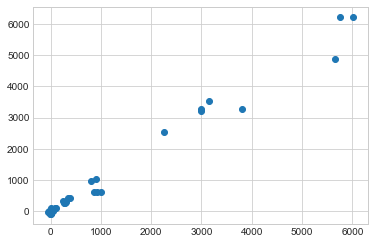

In [30]:
plt.scatter(tr1['mean_fpi1'],tr1['pred_eps'], marker = 'o')

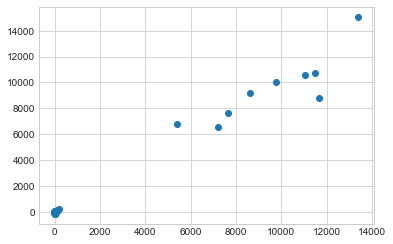

In [31]:
plt.scatter(ts1['mean_fpi1'],ts1['pred_eps'], marker = 'o')

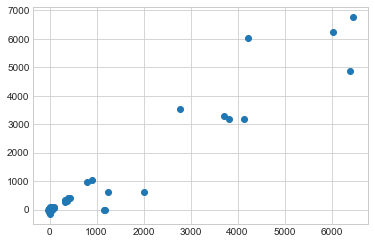

In [32]:
plt.scatter(tr2['mean_fpi2'],tr2['pred_eps'], marker = 'o')

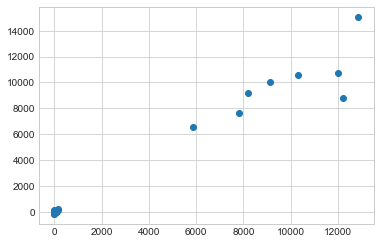

In [33]:
plt.scatter(ts2['mean_fpi2'],ts2['pred_eps'], marker = 'o')